# A Simple Closed Curve about Complex Analysis

We are going to do a couple fun examples using complex analysis. Let's first start with some context.

# Definitions

What is a complex number?

We define a complex number $z = a+bi$ where the imaginary part of z, $Im(z) = b$ and the real part, $Re(z) = a$. We can describe a complex number on a graph with an imaginary y axis and a real x axis.

We can equivalently define $z=a+bi$ as $z=re^{i\theta}$ where r is the magnitude of our vector and $\theta$ is the angle from the positive x-axis to the vector, conventionally defined from 0 to $2\pi$ radians.

In the plot below, we let a=1 and b=2.

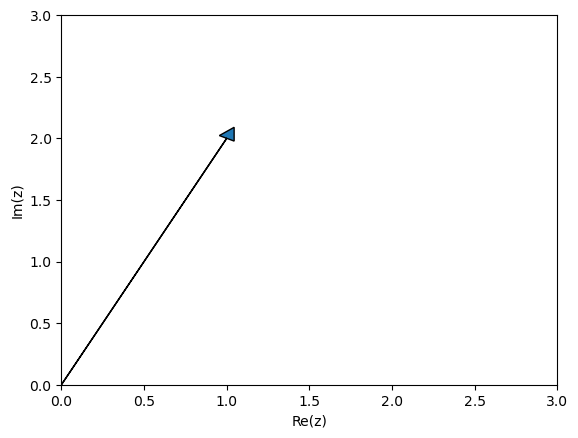

In [84]:
import matplotlib.pyplot as plt
ax = plt.axes()
ax.arrow(0,0, 1,2 , head_width=0.1, head_length=0.1)
plt.ylim(0,3)
plt.xlim(0,3)
plt.ylabel('Im(z)')
plt.xlabel('Re(z)')
plt.show()

Just like with real numbers, we can integrate along curves in the complex plane (which is made up of complex numbers).

A complex valued function $f(z)$ is said to be analytic on an open set G if it has a derivative at every point of G.

What is exciting about complex functions is if a function is differentiable in the first order, it is differentiable for any order.

This is a key that unlocks many magical secrets of complex analysis!

This analyticity provides a bound for all complex functions.

First a quick definiton. A simplly connected domain can be deformed to a single point. A simple curve has no singularities along it.


# Cauchy's Integral Formula

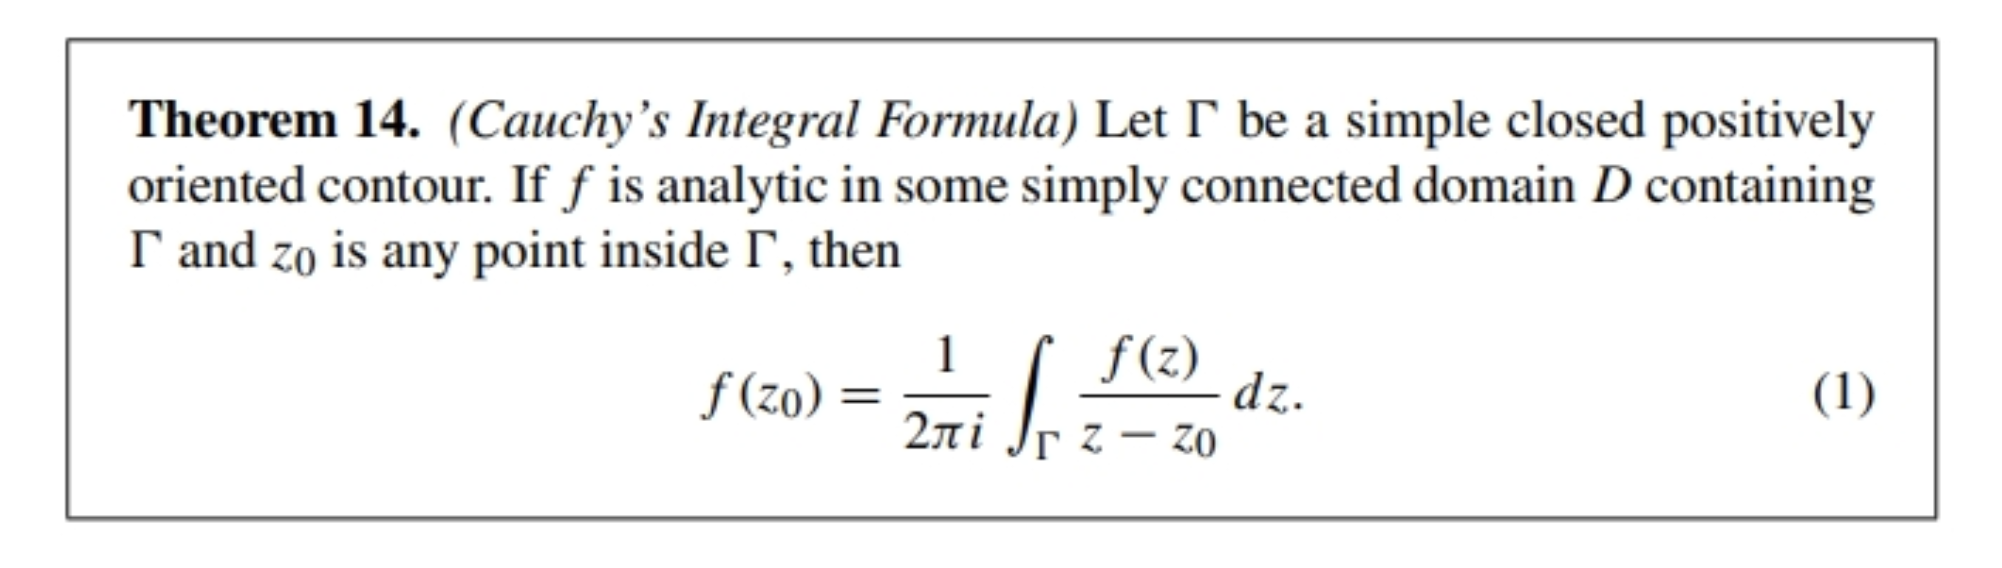

(a)

Singularities can be put into 3 categories: removeable singularities, poles and essential singularities. You can think about a removeable singularity as a condition where if you redefined the function, that singularity would go away. For instance if you had a function $f(z) = z^{2}/z$. This function has a removeable singularity at z=0 since if you simplify, you would get $f(z) = z$ which has no singularities. For a pole, as a function approaches a pole, it blows up to infinity. For instance, the funciton $f(z) = 1/z$ blows up as z approaches 0, which is the singularity. Finally, an essential singularity oscillates wildly, so the magnitude of $f(z)$ is neither bounded near the singularity nor goes to infinity. An example of such a function is $f(z) = sin(1/z)$ which oscillates wildly as z approaches 0.

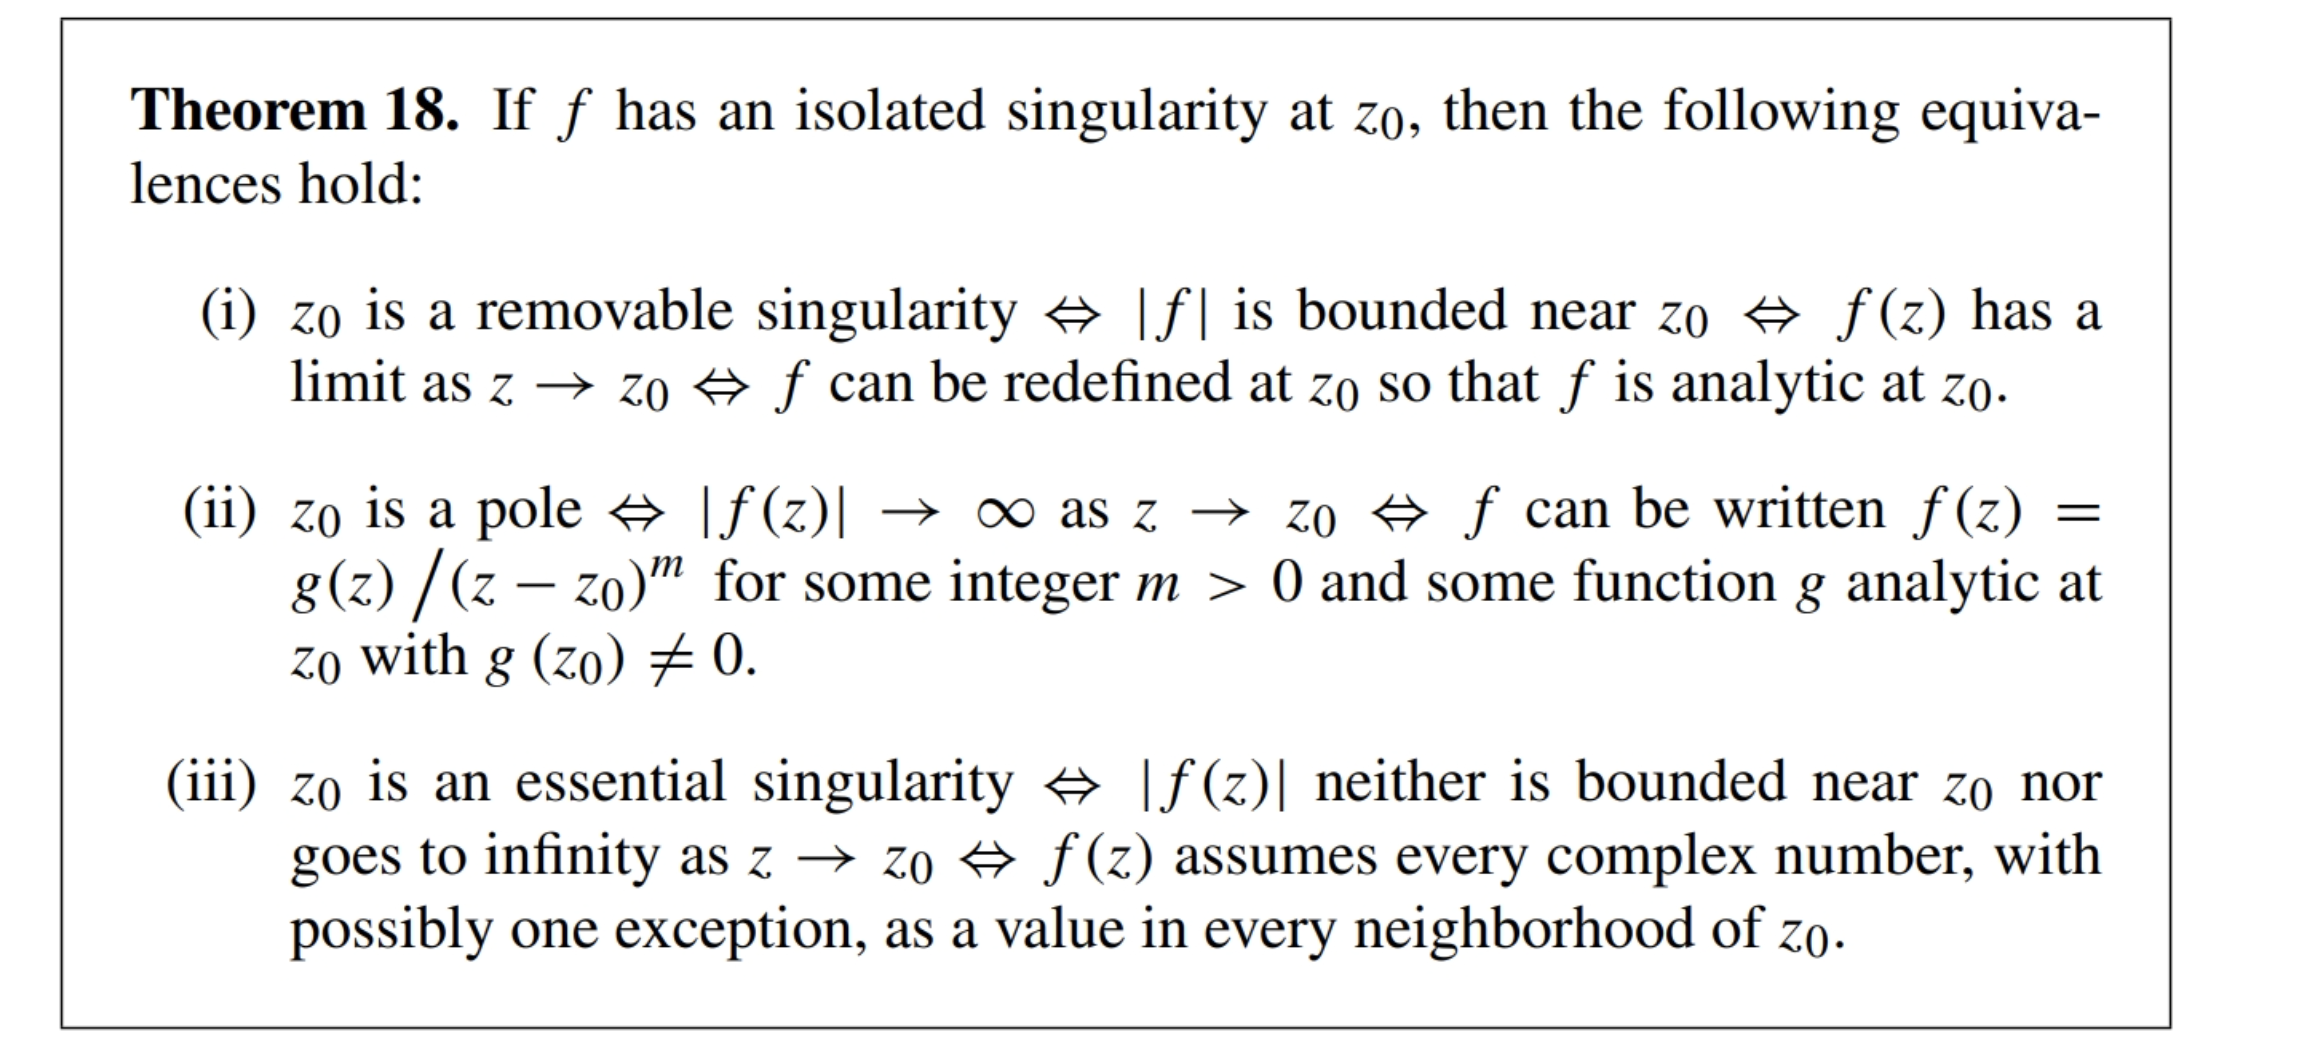

(a)

# Problem 1

Let's start out with some singularity classification. This will give us the opportunity to look at some graphs.

Let's first consider $f(z)=(z^{2}+1)/(z-1)$. You might be able to play with this toy example numerically to see what it is. If you have an idea, keep that in mind. Now let's look at what this function looks like in graphical form.

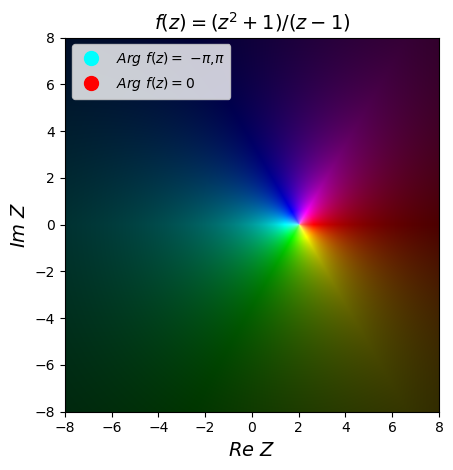

In [159]:
from colorsys import hls_to_rgb
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def colorize(fz):

    """
    The original colorize function can be found at:
    https://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array
    by the user nadapez.
    """
    
    r = np.log2(1. + np.abs(fz))
    
    h = np.angle(fz)/(2*np.pi)
    l = 1 - 0.45**(np.log(1+r)) 
    s = 1

    c = np.vectorize(hls_to_rgb)(h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (m,n,3)
    c = np.rot90(c.transpose(2,1,0), 1) # Change shape to (m,n,3) and rotate 90 degrees
    
    return c


N = 600
lim = 8
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y
f = 1 / (z-2)


from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='cyan', label='$Arg$ $f(z) =$ $-\pi$,$\pi$', markersize=10, lw=0),
                   Line2D([0], [0], marker='o', color='red', label='$Arg$ $f(z)=0$', markersize=10, lw=0)]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax.imshow(img, extent=[-lim,lim, -lim,lim])
ax.set_xlabel("$Re$ $Z$", fontsize=14)
ax.set_ylabel("$Im$ $Z$", fontsize=14)
ax.set_title(r"$f(z)=(z^2+1)/(z-1)$", fontsize=14)

plt.tight_layout()
plt.show()

(b) Note the domain coloring function was taken from reference b. This function was minorly modified to match the desired functions.

We can see there's a pole at z=2 which makes sense since limit as z approahces 2 of $1/(z - 2)$ approaches infinity. We can see the argument of z is defined from -$\pi$ to $\pi$. We can define any complex number $z= a + bi = re^{i\theta}$ where r is the distance from the radius and theta is the distance from the positive x-axis. In this case, we define theta as from -$\pi$ to $\pi$, so our values of z range from $re^{-i\pi}$ to $re^{i\pi}$.  We can redefine this graph in terms of another range of $\pi$. $\theta$ is color coded with theta=0 as red and $\theta = \pi$ as cyan. As we change our functions, we will see the domain coloring above changes. 

Let's consider $f(z) = z^{4}$.

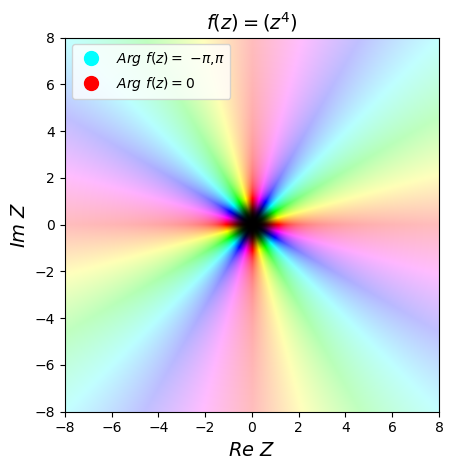

In [285]:
from colorsys import hls_to_rgb
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

N = 600
lim = 8
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y
f = z**4


from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='cyan', label='$Arg$ $f(z) =$ $-\pi$,$\pi$', markersize=10, lw=0),
                   Line2D([0], [0], marker='o', color='red', label='$Arg$ $f(z)=0$', markersize=10, lw=0)]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax.imshow(img, extent=[-lim,lim, -lim,lim])
ax.set_xlabel("$Re$ $Z$", fontsize=14)
ax.set_ylabel("$Im$ $Z$", fontsize=14)
ax.set_title(r"$f(z)=(z^4)$", fontsize=14)

plt.tight_layout()
plt.show()

(b)

Now we see our array of colors repeat four times. That's because $z^{4}=(re^{i\theta})^{4} = r^{4}e^{4i\theta}$. We can see as we traverse from 0 to $2\pi$, we go from $r^{4}e^{4i*0} = r^{4}$ to $r^{4}e^{4i*2\pi}$ = $r^{4}e^{8i\pi}$, which is 4 times from 0 to $2\pi$.

Let's consider one more function. Take $f(z) = tan(1/z)$

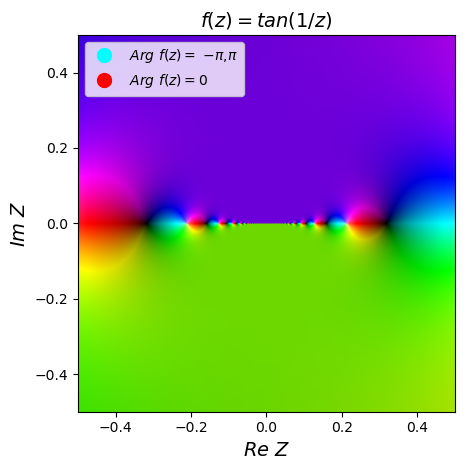

In [291]:
N = 600
lim = 0.5
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y
f = ((cmath.e**(1/z*1j)-cmath.e**(-1/z*1j))/(2*1j))/((cmath.e**(1/z*1j)+cmath.e**(-1/z*1j))/(2))

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='cyan', label='$Arg$ $f(z) =$ $-\pi$,$\pi$', markersize=10, lw=0),
                   Line2D([0], [0], marker='o', color='red', label='$Arg$ $f(z)=0$', markersize=10, lw=0)]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax.imshow(img, extent=[-lim,lim, -lim,lim])
ax.set_xlabel("$Re$ $Z$", fontsize=14)
ax.set_ylabel("$Im$ $Z$", fontsize=14)
ax.set_title(r"$f(z)=tan(1/z)$", fontsize=14)

plt.tight_layout()
plt.show()

(b)

We can see this has essential singularities at z=0 since the function is neither bounded nor goes to infinity there.

# Let's get Integrating!

# Problem 2

The next problem we will tackle involves an integral. We will use complex analysis to evaluate a real integral!

We want to compute $ \int_{-\infty}^{\infty} \dfrac{x^2+3}{(x^2+1)(x^2+4)}dx $

Let's do this by taking the integral of a semicircular contour then decomposing this integral into two parts.

We break this contour into $Cp_+$ defined as the semicircle with a radius defined as $\lim_{p\to \infty}$p and $\gamma$ defined as the part of the contour along the x-axis from $-\infty$ to $\infty$.

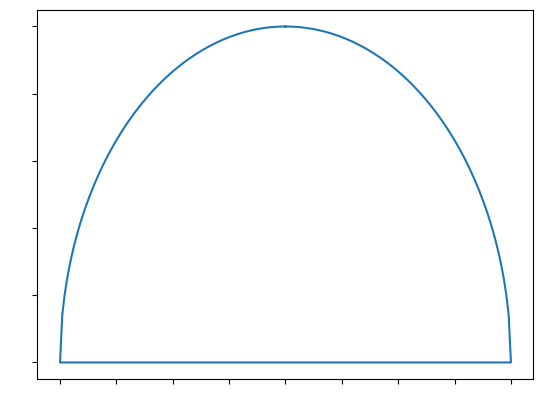

In [215]:
import matplotlib.pyplot as plt
import numpy as np

def generate_semicircle(center_x, center_y, radius, stepsize=0.1):
    """
    Generates coordinates for a semicircle, centered at center_x, center_y
    """        

    x = np.arange(center_x, center_x+radius+stepsize, stepsize)
    y = np.sqrt(radius**2 - x**2)

    # since each x value has two corresponding y-values, duplicate x-axis.
    # [::-1] is required to have the correct order of elements for plt.plot. 
    x = np.concatenate([x,-x[::-1]])

    # concatenate y and flipped y. 
    y = np.concatenate([y,y[::-1]])

    return x + center_x, y 

x,y = generate_semicircle(0,50,10, 0.1)
plt.plot(x, y)
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()

(c)

Let's first compute the contour integral of the entire region. Since this contour is a closed loop with the function analytic on and inside the region, we can apply Cauchy's Residue Theorem. 

The theorem is below.

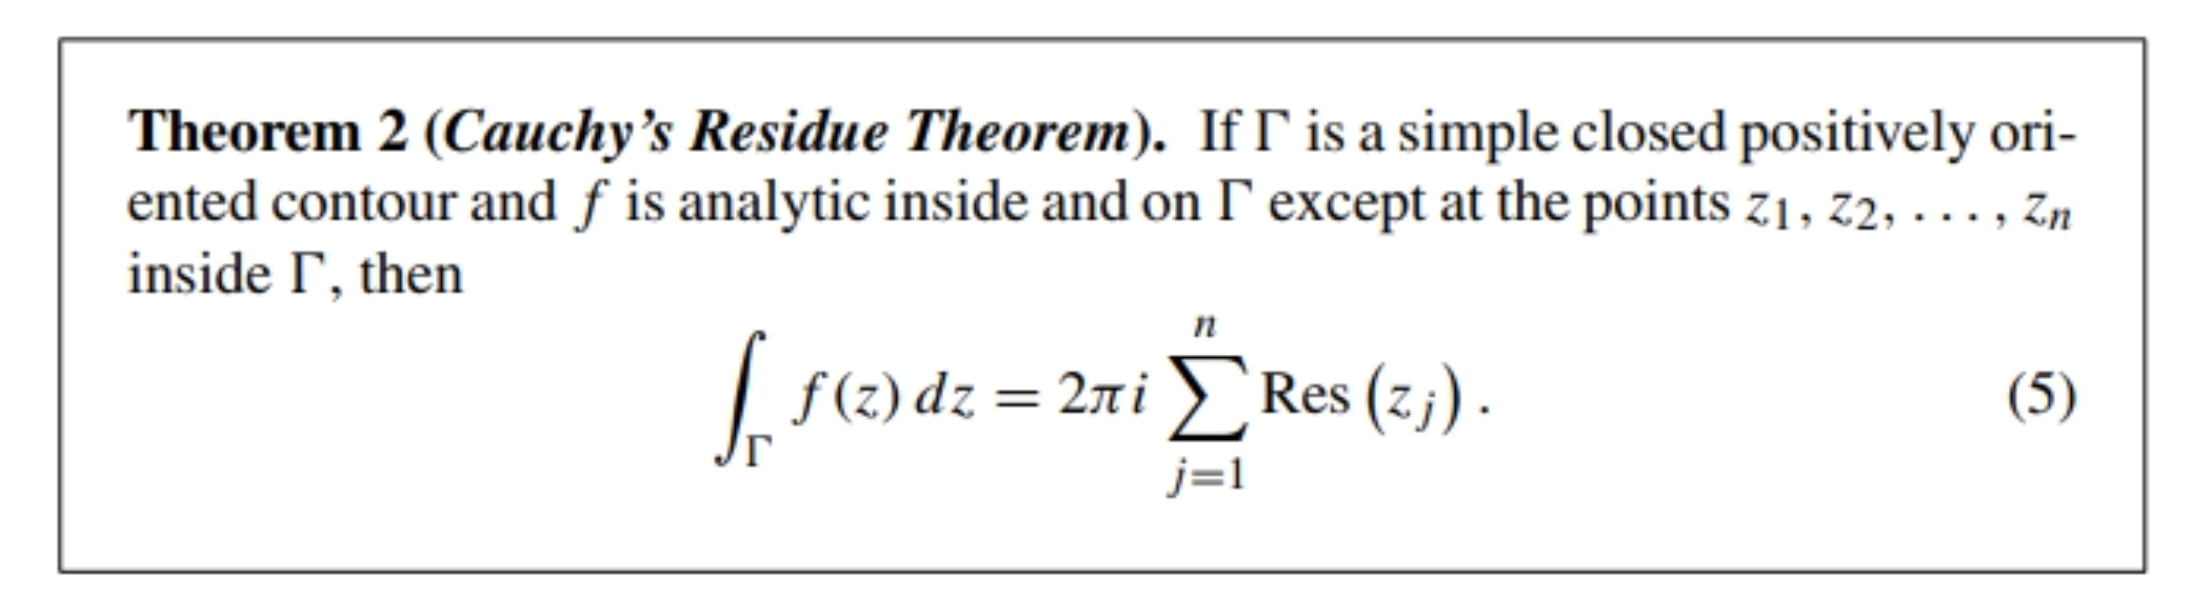

Let's quickly define a residue.

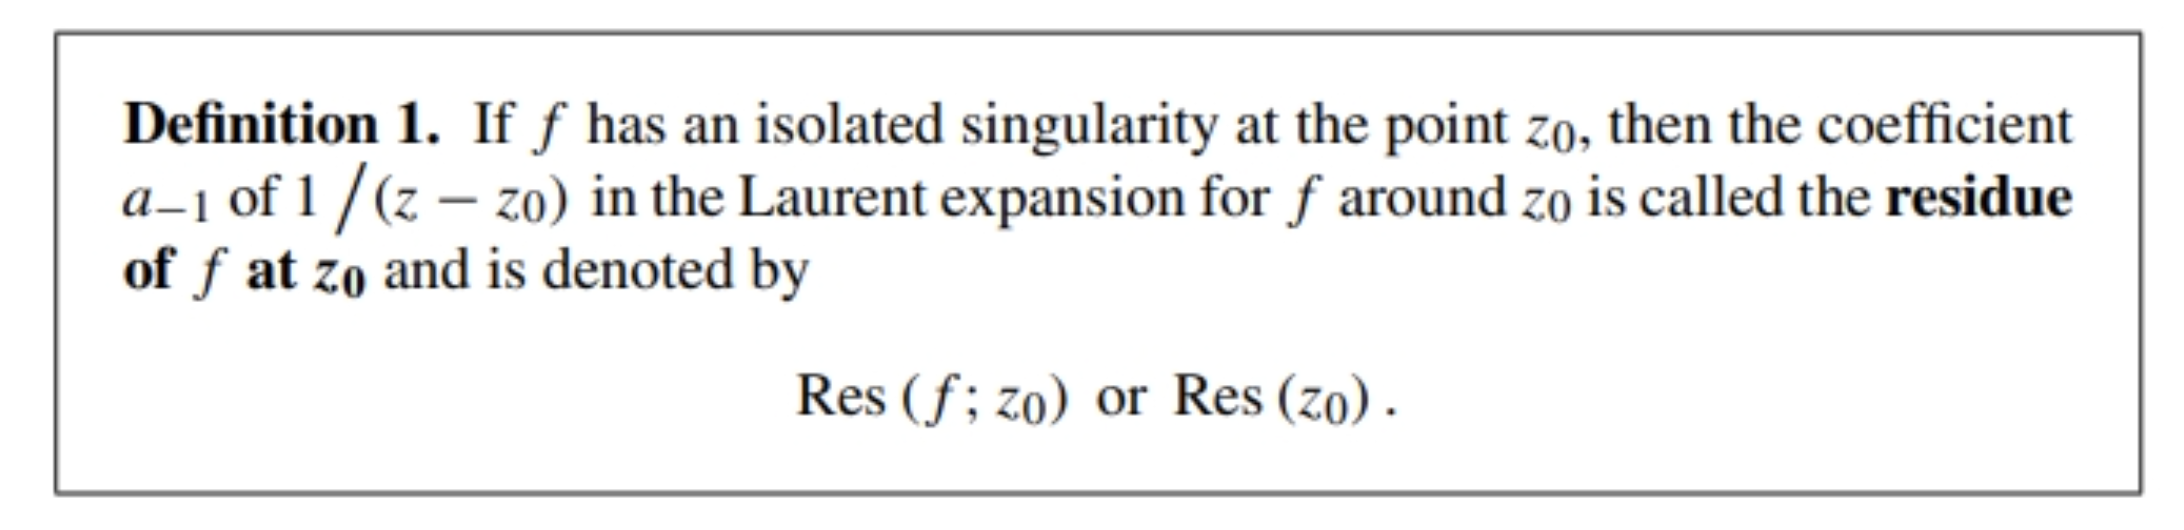

We can calculate the residue of each pole using the following theorem.

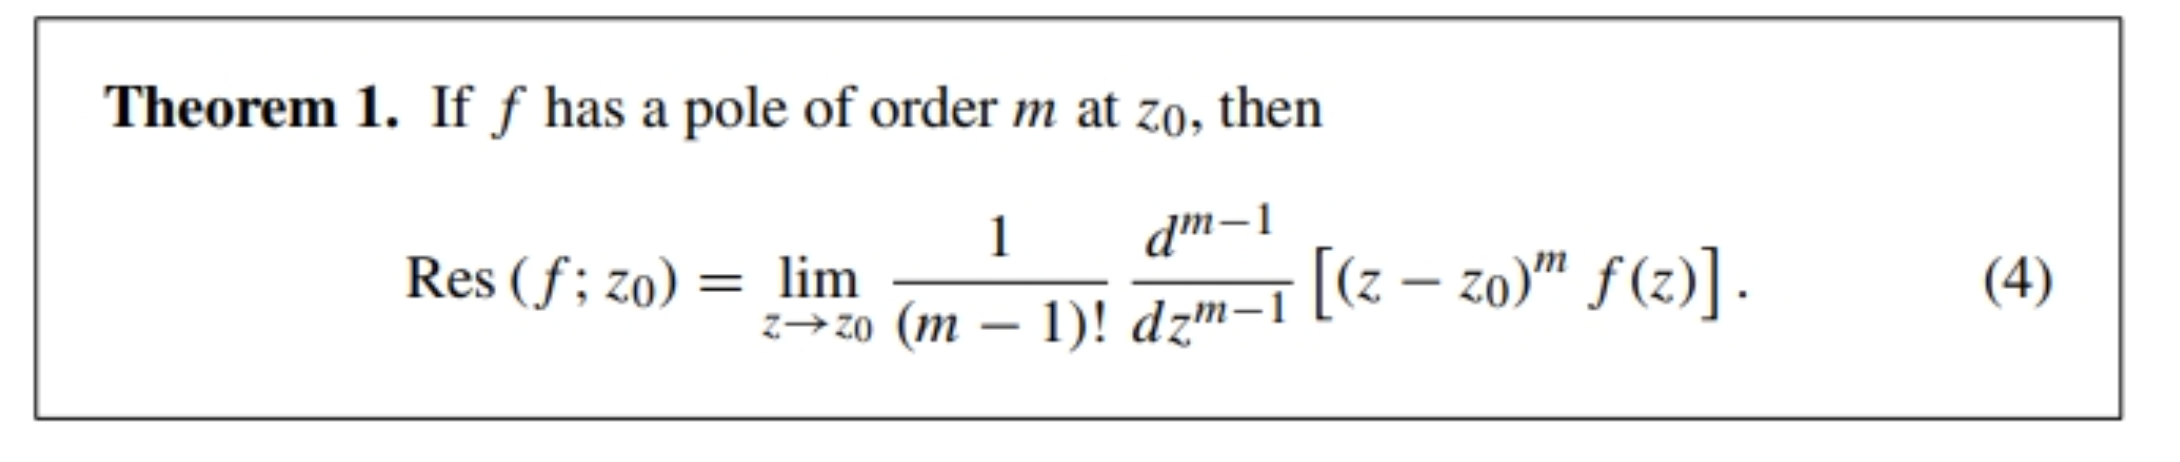

(a)

Let's graph our function to identify the poles.

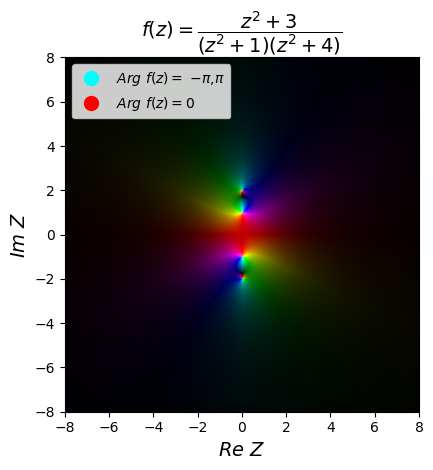

In [286]:
from colorsys import hls_to_rgb
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

N = 600
lim = 8
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y
f = (z**2+3)/(z**2+1)/(z**2+4)


from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='cyan', label='$Arg$ $f(z) =$ $-\pi$,$\pi$', markersize=10, lw=0),
                   Line2D([0], [0], marker='o', color='red', label='$Arg$ $f(z)=0$', markersize=10, lw=0)]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax.imshow(img, extent=[-lim,lim, -lim,lim])
ax.set_xlabel("$Re$ $Z$", fontsize=14)
ax.set_ylabel("$Im$ $Z$", fontsize=14)
ax.set_title(r"$f(z)=\dfrac{z^2+3}{(z^2+1)(z^2+4)}$", fontsize=14)

plt.tight_layout()
plt.show()

(b)

We can see there are 4 poles in this graph: +/-i and +/-2i. Since we are drawing our semicircle in the upper half plane, our region only encircles the point i and 2i. Let's compute both of these residues.

For i, we have $Res(f, i) = \lim_{z\to i}(z-i)\dfrac{z^2+3}{(z^2+1)(z^2+4)} = \lim_{z\to i} \dfrac{(z^2+3}{(z+i)(z^2+4)} = \dfrac{1}{3i}$

For 2i, we have $Res(f, 2i) = \lim_{z\to 2i}(z-2i)\dfrac{z^2+3}{(z^2+1)(z^2+4)} = \lim_{z\to 2i} \dfrac{(z^2+3}{(z^2+1)(z+2i)} = \dfrac{1}{12i}$

So applying the Residue Formula, we get

$ \int_{Cp_+ + \gamma} \dfrac{z^2+3}{(z^2+1)(z^2+4)}dz = 2\pi*i(\dfrac{1}{12i}+\dfrac{1}{3i}) = \dfrac{5\pi}{6}$

Now let's calculate the contour along $Cp_+$.

We can evaluate this using the ML estimate defined as:


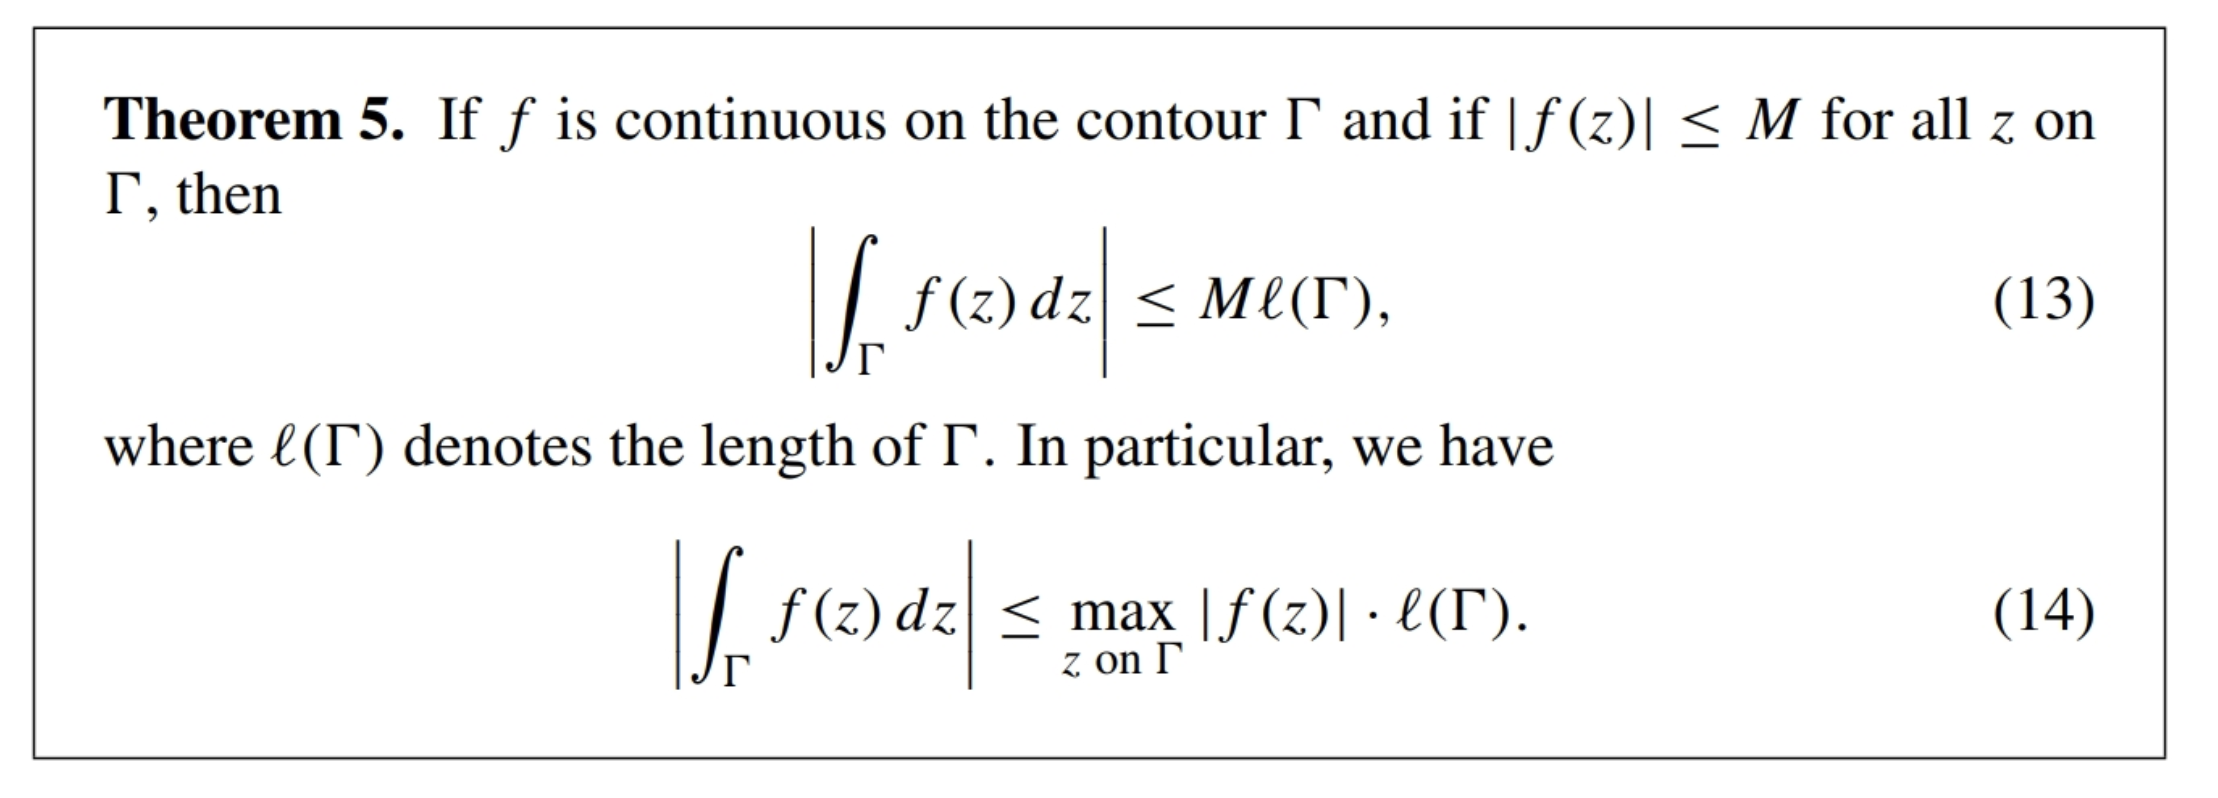

(a)

We know the length along $Cp_+$ is $\lim_{p\to \infty}\pi p$. We can use the triangular inequality to calculate the maximum value of our function along $Cp_+$ . 

We can see $\lim_{p\to \infty}\dfrac{z^2+3}{(z^2+1)(z^2+4)}$ = $\lim_{p\to \infty}\dfrac{z^2+3}{(z^2+1)(z^2+4)}$ = 0. So, $Cp_+$ contributes 0 to our integral.

Let I = $ \int_{-\infty}^{\infty} \dfrac{x^2+3}{(x^2+1)(x^2+4)}dx $. We know I + $Cp_+ = \dfrac{5\pi}{6}$.

Therefore I = $\dfrac{5\pi}{6}$.

# Problem 3

Let's do one last integral. This one along a toilet seat contour! 

Take $\int_{-\infty}^{\infty} \dfrac{x^n}{(x^2+4)^{2}}dx$ for n between -1 and 3.

When we see $z^n$ this immediately causes trouble since $z^n=r^ne^in\theta$. If n isn't an integer, we will have the value of z at 0 and 2$\pi$ different, so we have to make a conscious choice where we define our branch. Let's choose the principle branch for this function, which is from 0 to 2$\pi$. We define a branch as below:



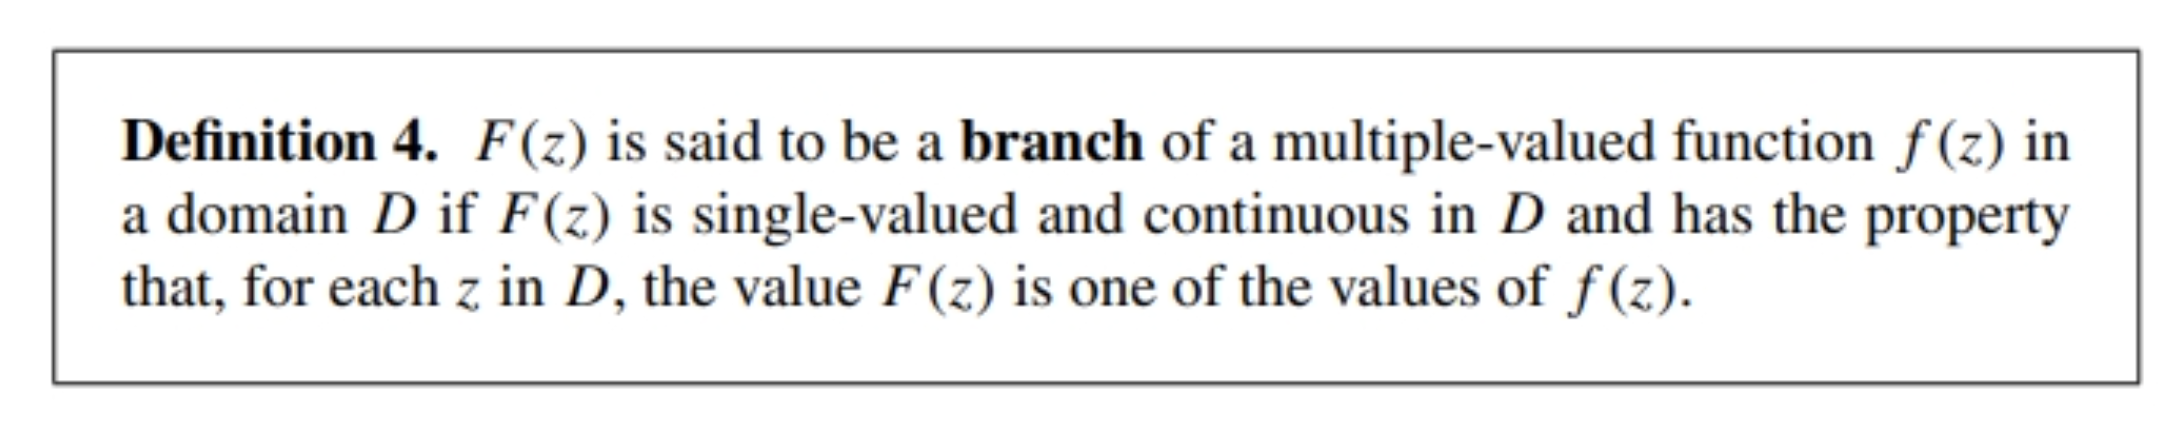

We will think of this integral as a toilet seat. It will be made up of a large outer circle $C_p$ whose radius p approaches $\infty$ and a smaller circle $C_\epsilon$ whose radius $\epsilon$ approaches 0+. We then will have one integral from $\epsilon$ to p at about $\theta = 0$ and one integral from p to $\epsilon$ at about 2$\pi$.

We will integrate along the contour below.

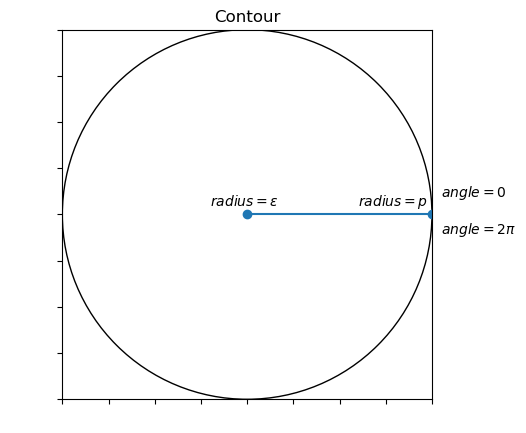

In [279]:
import matplotlib.pyplot as plt
 
figure, axes = plt.subplots()
Drawing_uncolored_circle = plt.Circle( (0, 0 ),
                                      1.00 ,
                                      fill = False )
Drawing_epsilon_circle = plt.Circle( (0, 0 ),
                                      0.01 ,
                                      fill = False )
x1, y1 = [0, 1], [0, 0]
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.plot(x1, y1, x2, y2, marker = 'o')
axes.set_aspect( 1 )
axes.add_artist( Drawing_uncolored_circle )
axes.add_artist( Drawing_epsilon_circle )
plt.title( 'Contour' )
plt.xticks(color='w')
plt.yticks(color='w')
plt.text(-.2,.05,'$radius = \epsilon$')
plt.text(0.6,.05,'$radius = p$')
plt.text(1.05,-.1,'$angle = 2\pi$')
plt.text(1.05,.1,'$angle = 0$')
plt.show()

We define $\gamma$ = $Cp$ + $C\epsilon$ + $\gamma_1$ + $\gamma_2$ where $\gamma_1$ is the portion of the contour from p to $\epsilon$ and $\gamma_2$ is the portion of the contour from $\epsilon$ to p.

Let's look at what this function looks like graphed to find the poles. We won't get poles from our top term, so let's assume n=0 for this graph.

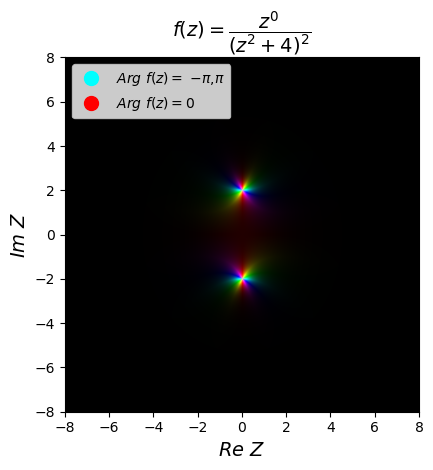

In [290]:
from colorsys import hls_to_rgb
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def colorize(fz):

    """
    The original colorize function can be found at:
    https://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array
    by the user nadapez.
    """
    
    r = np.log2(1. + np.abs(fz))
    
    h = np.angle(fz)/(2*np.pi)
    l = 1 - 0.45**(np.log(1+r)) 
    s = 1

    c = np.vectorize(hls_to_rgb)(h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (m,n,3)
    c = np.rot90(c.transpose(2,1,0), 1) # Change shape to (m,n,3) and rotate 90 degrees
    
    return c


N = 600
lim = 8
x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))
z = x + 1j*y
f = (1)/(z**2+4)/(z**2+4)


from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='cyan', label='$Arg$ $f(z) =$ $-\pi$,$\pi$', markersize=10, lw=0),
                   Line2D([0], [0], marker='o', color='red', label='$Arg$ $f(z)=0$', markersize=10, lw=0)]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper left')

img = colorize(f)
ax.imshow(img, extent=[-lim,lim, -lim,lim])
ax.set_xlabel("$Re$ $Z$", fontsize=14)
ax.set_ylabel("$Im$ $Z$", fontsize=14)
ax.set_title(r"$f(z)=\dfrac{z^0}{(z^2+4)^{2}}$", fontsize=14)

plt.tight_layout()
plt.show()

We can see clearly there are two poles. By Cauchy's integral formula, we know $\int_{\gamma} \dfrac{z^n}{(z^2+4)^{2}}dz $ = $2\pi i (Res(f,2i) + Res(f, -2i))$. Each of these poles is of order 2.

For 2i, we have $Res(f, 2i) = \lim_{z\to 2i}(z-2i)^{2}\frac{\partial}{\partial z}\dfrac{z^n}{(z^2+4)^{2}} = \lim_{z\to 2i} \dfrac{(z+2i)^{2}(n)z^{n-1} - z^n(2)(z+2i)}{(z+2i)^{4}} = \lim_{z\to 2i} \dfrac{(z+2i)nz^{n-1} - z^n(2)}{(z+2i)^{3}} = \dfrac{(4i)n(2i)^{n-1}-2(2i)^{n}}{4i^{3}} = \dfrac{n2^{n+1}i^{n}-2^{n+1}i^{n}}{4i^{3}} = \dfrac{(n-1)(-i)e^{\dfrac{i\pi n}{2}}}{-8}$

For -2i, we have $Res(f, -2i) = \lim_{z\to -2i}(z+2i)^{2}\frac{\partial}{\partial z}\dfrac{z^n}{(z^2+4)^{2}} = \lim_{z\to -2i} \dfrac{(z-2i)^{2}(n)z^{n-1} - z^n(2)(z-2i)}{(z-2i)^{4}} = \lim_{z\to -2i} \dfrac{(z-2i)nz^{n-1} - z^n(2)}{(z-2i)^{3}} = \dfrac{(4i)n(-2i)^{n-1}-2(2i)^{n}}{(-4i)^{3}} = \dfrac{n(2)^{n+1}(-i)^{n}-2^{n+1}(-i)^{n}}{(-4i)^{3}} = \dfrac{(n-1)(i)e^{\dfrac{3i\pi n}{2}}}{-8}$

So $\int_{\gamma} \dfrac{z^n}{(z^2+4)^{2}}dz = \dfrac{\pi e^{i \pi n / 2}(n-1)(1-e^{i\pi n})}{4}  $

Now let's calculate $C_p$. For $C_p$, we have $z=re^{i\theta}$ where r = p. So we can say $|pe^{i\theta}|$ = p. We can see $|\dfrac{z^n}{(z^2+4)^{2}}|$ = $|\lim_{p\to \infty}(\dfrac{p^{n}}{(p^2+4)^{2}})|$ approaches 0 since n is less than 3.

For $C_\epsilon$, we have $z=re^{i\theta}$ where r = $\epsilon$. So we can say $|\epsilon^{i\theta}| = \epsilon$. Therefore, $|\dfrac{z^n}{(z^2+4)^{2}}|$ = $\lim_{\epsilon\to 0} \dfrac{\epsilon^n}{(\epsilon^2+4)^{2}}$. This approaches 0 since n is greater than -1.

We can also on $\gamma_1$ we are above the branch cut, so we take $\theta$=0. This integral is along the x axis, so we want to look at dr. Let's do a change of variables. We know $z=re^{i\theta} so \dfrac{dz}{dr} = e^{i\theta}$. 

So, $\int_{\gamma_1} \dfrac{z^n}{(z^2+4)^{2}}dz = \int_{\gamma_1} \dfrac{z^n}{(z^2+4)^{2}}dz = \int_{\epsilon}^{p} \dfrac{re^{i\theta}}{((re^{i\theta})^2+4)^{2}}e^{i\theta}dr = \int_{\epsilon}^{p} \dfrac{re^{i*0}}{((re^{i*0})^2+4)^{2}}e^{i*0}dr = I $

Conversely, $\int_{\gamma_2} \dfrac{z^n}{(z^2+4)^{2}}dz = \int_{p}^{\epsilon} \dfrac{re^{i\theta}}{((re^{i\theta})^2+4)^{2}}e^{i\theta}dr = \int_{p}^{\epsilon} \dfrac{re^{i*2\pi}}{((re^{i2\pi})^2+4)^{2}}e^{i2\pi}dr = e^{2\pi ni}I. $

Bringing this all together, we have $0 = I(1+e^{2\pi ni}) + \pi i(n-1)2^{n}$.

Therefore, $I = \dfrac{\dfrac{\pi e^{i \pi n / 2}(n-1)(1-e^{i\pi n})}{4}}{1+e^{2\pi ni}} =  \dfrac{\dfrac{\pi e^{i \pi n / 2}(n-1)(1-e^{i\pi n})}{4}}{(1-e^{\pi ni})(1+e^{\pi ni})} = \dfrac{\pi e^{i \pi n / 2}(n-1)}{4(1+e^{\pi ni})} = \dfrac{\pi(n-1)}{4(e^{-\pi ni/2}+e^{\pi ni/2})} = \dfrac{\pi(n-1)}{8(cos(n\pi/2)}$.



# References

(a) “Saff, Snider - Complex Analysis Solutions Manual (3rd Ed.).” Academia.edu, 13 Nov. 2017, https://www.academia.edu/35136293/Saff_Snider_Complex_Analysis_Solutions_Manual_3rd_Ed_. 

(b) https://www.algorithm-archive.org/contents/domain_coloring/domain_coloring.html

(c) https://www.appsloveworld.com/coding/python3x/134/how-to-draw-a-semicircle-using-matplotlib